# Project 2 Part 2 - Exploratory Data Analysis & Cleaning

## Project Information

Experiments were carried out with a group of 30 volunteers
 * age range: 19 - 48 years
 * Samsung Galaxy SII worn on waist
  
**Basic Experiments**
 * Static Postures
     * standing
     * sitting
     * lying
 * Dynamic Activities
     * walking
     * walking downstairs
     * walking upstairs
 * Postural Transitions
     * stand to sit
     * sit to stand
     * sit to lie
     * lie to sit
     * stand to lie
     * lie to stand
     
**Data**
 * tri-axial measurements of 
     * Acceleration
     * Angular Velocity
  
 * X = a 561-feature vector with time and frequency domain variables.
 * y = Its associated activity label.
 * An identifier of the subject who carried out the experiment. 
 * Partitioned Randomly
     * 70% training
     * 30% testing
  
 * Window is 2.56 seconds
 * 128 sensor readings per window
 * Features are normalized and bounded within [-1,1].
 * Each feature vector is a row on the 'X' and 'y' files.
 * The units used for the accelerations (total and body) are 'g's.
 * The gyroscope units are rad/sec
 


## Target Vector Labels

In [1]:
label_dict ={ 
 1 :'WALKING',             
 2 :'WALKING_UPSTAIRS',    
 3 :'WALKING_DOWNSTAIRS',  
 4 :'SITTING',             
 5 :'STANDING',            
 6 :'LAYING',              
 7 :'STAND_TO_SIT',        
 8 :'SIT_TO_STAND',        
 9 :'SIT_TO_LIE',          
 10 :'LIE_TO_SIT',          
 11 :'STAND_TO_LIE',        
 12 :'LIE_TO_STAND'} 

## Import Statements

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score

## Load Data
Data is already separated into a training and testing dataset.  I will recombine the data such that dimensionality reduction techniques can be applied.

### Load text files

In [3]:
# training data
train_data = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\Train\X_train.txt"
train_labels = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\Train\y_train.txt"

# testing data
test_data = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\Test\X_test.txt"
test_labels = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\Test\y_test.txt"

# column names (feature names)
col_names = r"D:\CodingDojo\smartphone_activity_recognition\data\HAPT Data Set\features.txt"

### Fix column header names
need to rename 2nd and 3rd measurements for 14 columns

In [4]:
# create columns dataframe
columns = pd.read_csv(col_names, sep='\n', header=None, names=['Features'])

# strip whitespace from each column name
columns['Features'] = columns['Features'].str.strip()

# set column names to list
col_names = list(columns['Features'])

# empty set to capture duplicates
duplicates = set()

# for loop to capture duplicate feature names
for i in col_names:
    if col_names.count(i) > 1:
        duplicates.add(i)
duplicates

{'fBodyAcc-Kurtosis-1',
 'fBodyAcc-Skewness-1',
 'fBodyAcc-ropy-1',
 'fBodyAccJerk-Kurtosis-1',
 'fBodyAccJerk-Skewness-1',
 'fBodyAccJerk-ropy-1',
 'fBodyGyro-Kurtosis-1',
 'fBodyGyro-Skewness-1',
 'fBodyGyro-ropy-1',
 'tBodyAcc-ropy-1',
 'tBodyAccJerk-ropy-1',
 'tBodyGyro-ropy-1',
 'tBodyGyroJerk-ropy-1',
 'tGravityAcc-ropy-1'}

In [6]:
# rename duplicated columns

# fBodyAcc-Kurtosis-1
col_names[299] = 'fBodyAcc-Kurtosis-2'
col_names[301] = 'fBodyAcc-Kurtosis-3'

# fBodyAcc-Skewness-1
col_names[298] = 'fBodyAcc-Skewness-2'
col_names[300] = 'fBodyAcc-Skewness-3'

# fBodyAcc-ropy-1
col_names[288] = 'fBodyAcc-ropy-2'
col_names[289] = 'fBodyAcc-ropy-3'

# fBodyAccJerk-Kurtosis-1
col_names[378] = 'fBodyAccJerk-Kurtosis-2'
col_names[380] = 'fBodyAccJerk-Kurtosis-3'

# 'fBodyAccJerk-Skewness-1'
col_names[377] = 'fBodyAccJerk-Skewness-2'
col_names[379] = 'fBodyAccJerk-Skewness-3'

# 'fBodyAccJerk-ropy-1'
col_names[367] = 'fBodyAccJerk-ropy-2'
col_names[368] = 'fBodyAccJerk-ropy-3'

# 'fBodyGyro-Kurtosis-1'
col_names[457] = 'fBodyGyro-Kurtosis-2'
col_names[459] = 'fBodyGyro-Kurtosis-3'

# 'fBodyGyro-Skewness-1'
col_names[456] = 'fBodyGyro-Skewness-2'
col_names[458] = 'fBodyGyro-Skewness-3'

# 'fBodyGyro-ropy-1'
col_names[446] = 'fBodyGyro-ropy-2'
col_names[447] = 'fBodyGyro-ropy-3'

# 'tBodyAcc-ropy-1'
col_names[23] = 'tBodyAcc-ropy-2'
col_names[24] = 'tBodyAcc-ropy-3'

# 'tBodyAccJerk-ropy-1'
col_names[103] = 'tBodyAccJerk-ropy-2'
col_names[104] = 'tBodyAccJerk-ropy-3'

# 'tBodyGyro-ropy-1'
col_names[143] = 'tBodyGyro-ropy-2'
col_names[144] = 'tBodyGyro-ropy-3'

# 'tBodyGyroJerk-ropy-1'
col_names[183] = 'tBodyGyroJerk-ropy-2'
col_names[184] = 'tBodyGyroJerk-ropy-3'

# 'tGravityAcc-ropy-1'
col_names[63] = 'tGravityAcc-ropy-2'
col_names[64] = 'tGravityAcc-ropy-3'


### Construct Dataframes for training and testing data

In [7]:
# construct dataframes
X_train = pd.read_csv(train_data, sep=' ', header=None, names=col_names)
y_train = pd.read_csv(train_labels, sep=' ', header=None, names=['Labels'])

X_test = pd.read_csv(test_data, sep=' ', header=None, names=col_names)
y_test = pd.read_csv(test_labels, sep=' ', header=None, names=['Labels'])

In [8]:
# data shapes to verify final dataframe shape
print(X_train.shape, X_test.shape)

(7767, 561) (3162, 561)


In [9]:
# flatten target vectors
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [10]:
# check target vector shape
print(y_train.shape, y_test.shape)

(7767,) (3162,)


## Exploratory Data Analysis
Check the dataset for 
* balance of labeled features (human activities)

### Activity Balance in Dataset

In [11]:
# convert to dataframe
y = pd.DataFrame(data= y_train, columns=['Labels_Int'])

# add label names
y['Labels']= y['Labels_Int'].map(label_dict)

# group categories and get count
cat_counts = y.groupby('Labels').size()

# sort values for plotting
cat_counts.sort_values(ascending=False, inplace=True)

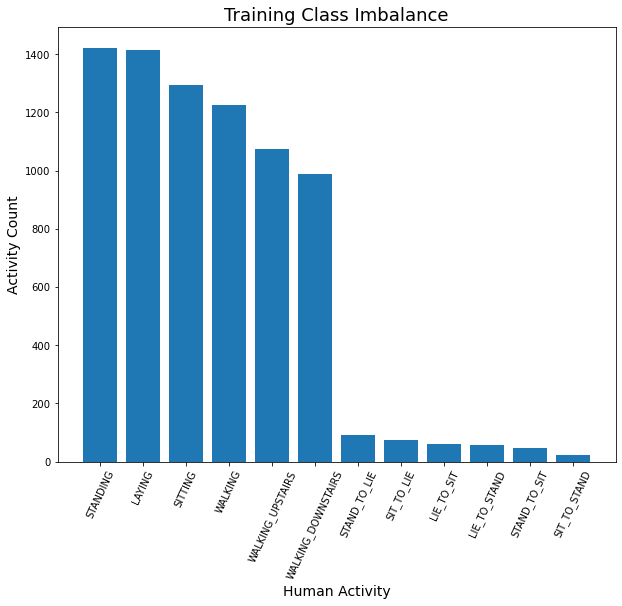

In [33]:
# make bar plot of label counts
plt.figure(figsize=(10,8))
plt.bar(x=cat_counts.index, height=cat_counts.values)
plt.xticks(rotation=65)
plt.xlabel('Human Activity', fontsize=14)
plt.ylabel('Activity Count', fontsize=14)
plt.title('Training Class Imbalance', fontsize=18);


**Discussion:**
The distribution of activity classes is not even.  However, the activities representing the transition to and from sitting are balanced among themselves, and the same is true for the performed activities (standing, laying, sitting, walking, upstairs, downstairs).  This dataset may be a candidate for a over/under sampling strategy.  For now, I will model without addressing the data imbalance.

In [34]:
# convert to dataframe
y = pd.DataFrame(data= y_test, columns=['Labels_Int'])

# add label names
y['Labels']= y['Labels_Int'].map(label_dict)

# group categories and get count
cat_counts = y.groupby('Labels').size()

# sort values for plotting
cat_counts.sort_values(ascending=False, inplace=True)

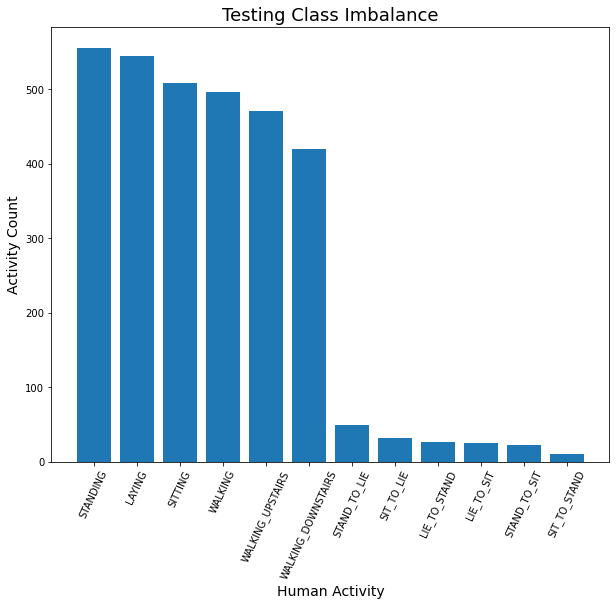

In [35]:
# make bar plot of label counts
plt.figure(figsize=(10,8))
plt.bar(x=cat_counts.index, height=cat_counts.values)
plt.xticks(rotation=65)
plt.xlabel('Human Activity', fontsize=14)
plt.ylabel('Activity Count', fontsize=14)
plt.title('Testing Class Imbalance', fontsize=18);

## Primary Component Analysis

In [39]:
# fit PCA
pca = PCA()
pca.fit(X_train)

PCA()

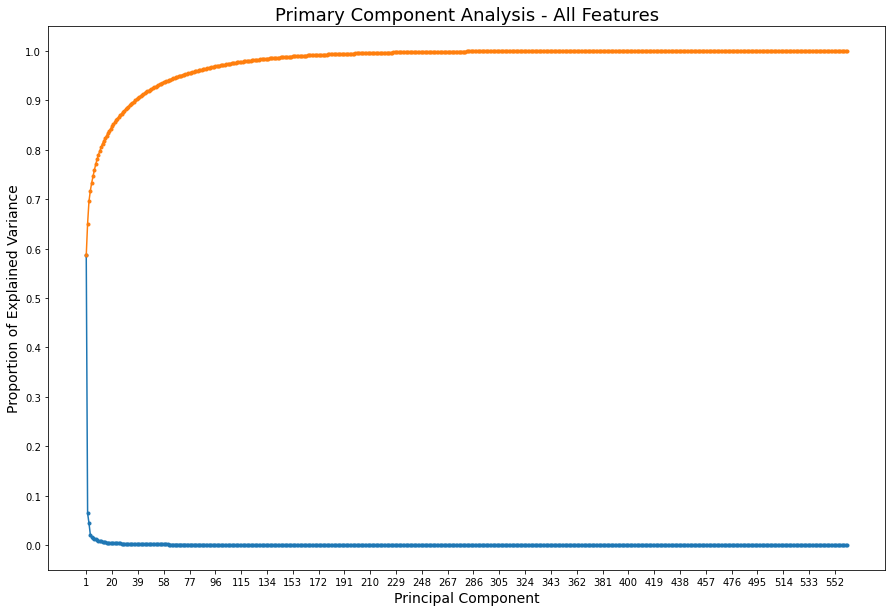

In [50]:
# Plot the explained variance ratios of the principal components
plt.figure(figsize=(15,10))
plt.plot(range(1, 562), pca.explained_variance_ratio_[:562], marker = '.')
plt.plot(range(1, 562), pca.explained_variance_ratio_.cumsum()[:562], marker= '.')
plt.xticks(ticks = range(1, 562, 19))
plt.yticks(ticks = np.arange(0,1.1,0.1))
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Proportion of Explained Variance', fontsize=14)
plt.title('Primary Component Analysis - All Features', fontsize=18);

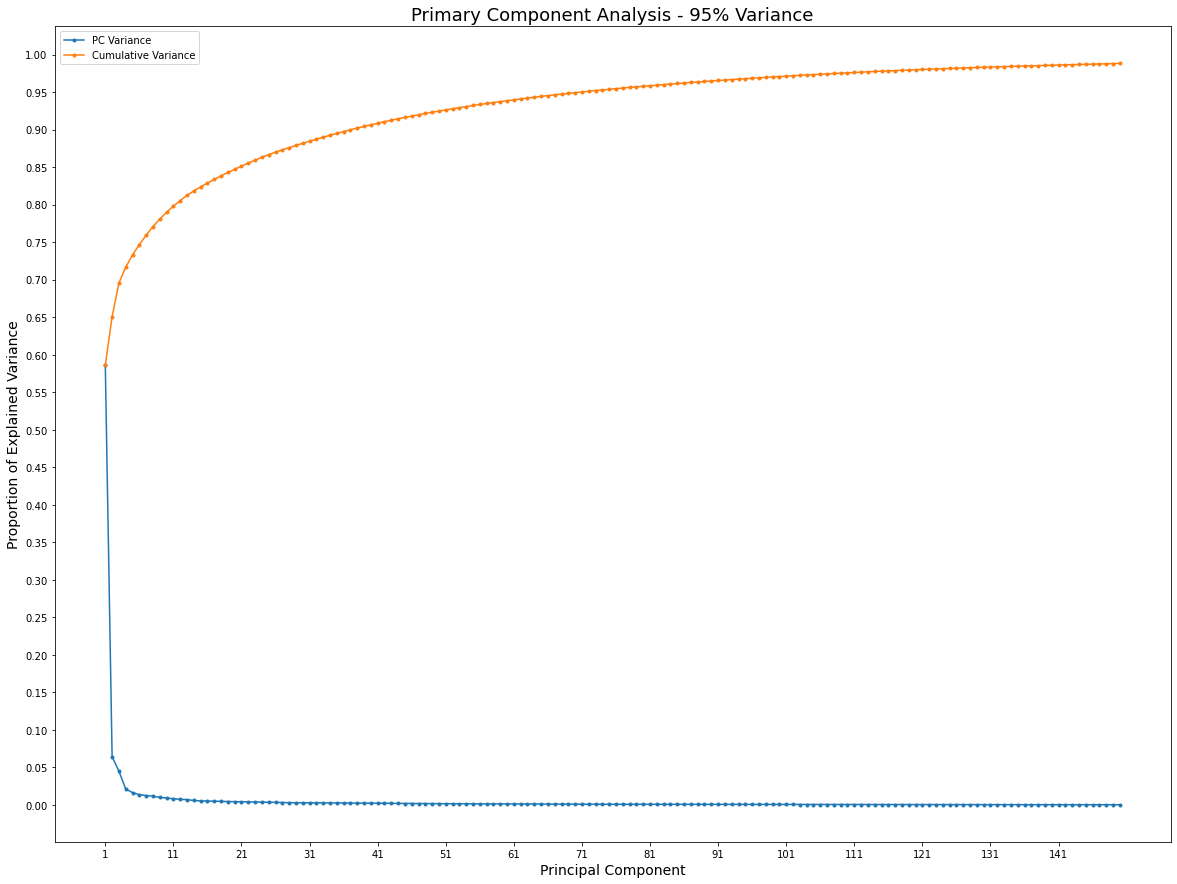

In [52]:
# Plot the explained variance ratios of the principal components
plt.figure(figsize=(20,15))
plt.plot(range(1, 151), pca.explained_variance_ratio_[:150], marker = '.', label='PC Variance')
plt.plot(range(1, 151), pca.explained_variance_ratio_.cumsum()[:150], marker= '.', label='Cumulative Variance')
plt.xticks(ticks = range(1, 151, 10))
plt.yticks(ticks = np.arange(0,1.04,0.05))
plt.xlabel('Principal Component', fontsize=14)
plt.ylabel('Proportion of Explained Variance', fontsize=14)
plt.title('Primary Component Analysis - 95% Variance', fontsize=18)
plt.legend();

In [44]:
# cumulative explained variance ratio
# get number of features in PCA
pca.explained_variance_ratio_.cumsum()

array([0.58635593, 0.65061206, 0.69550222, 0.71667127, 0.7330351 ,
       0.74667014, 0.75918678, 0.77077569, 0.78076075, 0.7898681 ,
       0.79795839, 0.80536231, 0.81243315, 0.81830961, 0.82365931,
       0.82878268, 0.83365408, 0.83842075, 0.84285204, 0.84713231,
       0.85131047, 0.85540207, 0.85938611, 0.86311702, 0.86663226,
       0.8699691 , 0.8730574 , 0.87604301, 0.87896187, 0.88184787,
       0.88466055, 0.88735948, 0.88996351, 0.89249894, 0.89499601,
       0.89744152, 0.89983051, 0.90208537, 0.90431538, 0.90649674,
       0.90857277, 0.91057344, 0.91250437, 0.91441959, 0.91626562,
       0.91805348, 0.91982082, 0.92149452, 0.9231299 , 0.92472472,
       0.92626142, 0.9277922 , 0.92928741, 0.93076284, 0.93217618,
       0.93351329, 0.9348429 , 0.93610714, 0.93734143, 0.93855339,
       0.93975086, 0.94090135, 0.94202863, 0.9431466 , 0.94423646,
       0.94529978, 0.94632387, 0.94734607, 0.94832573, 0.94928166,
       0.9502346 , 0.95114866, 0.95203604, 0.95289685, 0.95374

**Discussion:**  
95% of the variance can be captured with 75 features. 

In [17]:
# fit PCA to data
pca = PCA(n_components = 285)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Model Parameter Tuning with Grid Search

### KNN GridSearchCV

In [ ]:
params = {'n_neighbors': [3, 5, 7, 9, 11],
          'weights': ['uniform','distance'],
          'leaf_size': [20,30,50],
          'p': [1,2]}

knn = KNeighborsClassifier()
gs = GridSearchCV(knn, params, cv=5)
gs.fit(X_train, y_train)

In [ ]:
gs.best_params_

In [ ]:
gs.best_score_

start 10:34
end 11:03

### Random Forests GridSearchCV

In [ ]:
rf_params = {'n_estimators':[100, 150],
          'max_depth': [5, 10],
          'min_samples_split':[4, 6],
          'min_samples_leaf': [2, 3]}

rf = RandomForestClassifier(random_state=3)
rf_gs = GridSearchCV(rf,rf_params)
rf_gs.fit(X_train, y_train)

In [ ]:
rf_gs.best_params_

In [ ]:
rf_gs.best_score_

start 11:10
end 11:50

### Gradient Boost GridSearchCV

In [ ]:
gbc_params = {'n_estimators': [100, 200],
          'learning_rate': [0.1, .3],
          'max_depth': [3, 5]}

gbc = GradientBoostingClassifier()
gbc_gs = GridSearchCV(gbc, gbc_params)
gbc_gs.fit(X_train, y_train)


In [ ]:
gbc_gs.best_params_

In [ ]:
gbc_gs.best_score_

start 11:55
end 

### Xtreme Gradient Boost GridSearchCV

In [ ]:
xgb_params = {'n_estimators': [100, 200],
          'learning_rate': [0.1, .3],
          'max_depth': [3, 5],
          'gamma': [.1, 1]}

xgb = XGBClassifier()
xgb_gs = GridSearchCV(xgb, xgb_params)
xgb_gs.fit(X_train, y_train)


In [ ]:
xgb_gs.best_params_

In [ ]:
xgb_gs.best_score_

## Run Models

In [18]:
# create a dictionary of models
# this allows for easy change of model hyperparameters
# code inspired from 
# https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/

def define_models(models=dict()):
    
    # nonlinear model
    models['knn'] = KNeighborsClassifier(n_neighbors=5, 
                                         p=1, 
                                         leaf_size=20, 
                                         weights='distance')
    
    # ensemble models
    models['rf'] = RandomForestClassifier(n_estimators=100, random_state=3)
    models['xgb'] = XGBClassifier(use_label_encoder=True, random_state=3)
    models['gbc'] = GradientBoostingClassifier(n_estimators=100, random_state=3)
    
    return models

In [19]:
# create function to evaluate models
# code inspired from 
# https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/

def evaluate_model(model, X_train, X_test, y_train, y_test):
    
    # fit the model
    model.fit(X_train, y_train)
    
    # get predictions
    preds = model.predict(X_test)
    
    # evaluate model
    accuracy = accuracy_score(y_test, preds)
    
    return accuracy

In [20]:
# create function to capture model results
# code inspired from 
# https://machinelearningmastery.com/evaluate-machine-learning-algorithms-for-human-activity-recognition/

def model_results(models, X_train, X_test, y_train, y_test):
    
    # dictionary to store results
    results = dict()
    
    # for loop to iterate through dictionary
    for name, model in models.items():
        
        # capture model results
        results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)
        
        # progress print statement
        print(f'Model: {name}  Result: {results[name] * 100:.2f}%')
        
    return results

In [21]:
# create models dictionary
models = define_models()

In [22]:
# evaluate models and get results
results = model_results(models, X_train, X_test, y_train, y_test)

Model: knn  Result: 89.63%
Model: rf  Result: 90.99%


D:\Anaconda\envs\datsci\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:32:31] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Model: xgb  Result: 92.09%
Model: gbc  Result: 88.99%


In [23]:
df = pd.DataFrame(results, index= [0])
df

,knn,rf,xgb,gbc
0,0.896268,0.909867,0.920936,0.889943


In [55]:
df1 = pd.melt(df, var_name='Model', value_name='Accuracy Score')
df1.sort_values(ascending=False, by='Accuracy Score').reset_index(drop=True)

,Model,Accuracy Score
0,xgb,0.920936
1,rf,0.909867
2,knn,0.896268
3,gbc,0.889943
